## The objective is to explore impact of adding features to Linear Regression model.
Initially we will select a model with 3 features and go on adding features to it to see impact.

In [1]:
import numpy as np
import pandas as pd

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str,'sqft_basement':int,
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
# 1. Load data
# 2. Data is already split in train and test
kc_train = pd.read_csv(r'.\..\Datasets\kc_house_train_data.csv')
kc_test = pd.read_csv(r'.\..\Datasets\kc_house_test_data.csv')

#### 3. Although we often think of multiple regression as including multiple different features (e.g. # of bedrooms, square feet, and # of bathrooms) but we can also consider transformations of existing variables e.g. the log of the square feet or even "interaction" variables such as the product of bedrooms and bathrooms. Add 4 new variables in both your train_data and test_data. 

* ‘bedrooms_squared’ = ‘bedrooms’*‘bedrooms’
* ‘bed_bath_rooms’ = ‘bedrooms’*‘bathrooms’
* ‘log_sqft_living’ = log(‘sqft_living’)
* ‘lat_plus_long’ =  ‘lat’ + ‘long’
                                                                                         
Before we continue let’s explain these new variables:

* Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this variable will mostly affect houses with many bedrooms.
* Bedrooms times bathrooms is what's called an "interaction" variable. It is large when both of them are large.
* Taking the log of square feet has the effect of bringing large values closer together and spreading out small values.
* Adding latitude to longitude is non-sensical but we will do it anyway to see impact

In [4]:
# On train data
kc_train['bedrooms_squared'] = pow(kc_train['bedrooms'], 2)
kc_train['bed_bath_rooms'] = kc_train['bedrooms'] * kc_train['bathrooms']
kc_train['log_sqft_living'] = np.log(kc_train['sqft_living'])
# Adding latitude to longitude is non-sensical but we will do it anyway to see impact
kc_train['lat_plus_long'] = kc_train['lat'] + kc_train['long']

# On test data
kc_test['bedrooms_squared'] = pow(kc_test['bedrooms'], 2)
kc_test['bed_bath_rooms'] = kc_test['bedrooms'] * kc_test['bathrooms']
kc_test['log_sqft_living'] = np.log(kc_test['sqft_living'])
# Adding latitude to longitude is non-sensical but we will do it anyway to see impact
kc_test['lat_plus_long'] = kc_test['lat'] + kc_test['long']

In [5]:
# 4. what are the mean (arithmetic average) values of 4 new variables on TEST data?

kc_test.mean(axis=0)[-4:]

bedrooms_squared    12.446678
bed_bath_rooms       7.503902
log_sqft_living      7.550275
lat_plus_long      -74.653334
dtype: float64

#### 5. Use a regression function to estimate the regression coefficients/weights for predicting ‘price’ for the following three models:

* Model 1: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’, and ‘long’
* Model 2: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, and ‘bed_bath_rooms’
* Model 3: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, ‘bed_bath_rooms’, ‘bedrooms_squared’, ‘log_sqft_living’, and ‘lat_plus_long’

We can see that the three models here are “nested” in that all of the features of the Model 1 are in Model 2 and all of the features of Model 2 are in Model 3.  

In [6]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()

In [7]:
# Create three feature lists for three models

l1 = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
l2 = l1 + ['bed_bath_rooms']
l3 = l2 + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

X1 = kc_train[l1]
X2 = kc_train[l2]
X3 = kc_train[l3]
y = kc_train['price']

In [8]:
# Learn all three models on the TRAINING data set.
m1 = lr1.fit(X1, y)
m2 = lr2.fit(X2, y)
m3 = lr3.fit(X3, y)

In [9]:
# 6. What is the sign (positive or negative) for the coefficient/weight for ‘bathrooms’ in Model 1?
# Ans: Positive

m1.coef_

array([ 3.12258646e+02, -5.95865332e+04,  1.57067421e+04,  6.58619264e+05,
       -3.09374351e+05])

In [10]:
# 7. What is the sign (positive or negative) for the coefficient/weight for ‘bathrooms’ in Model 2?
# Ans: Negative

m2.coef_

array([ 3.06610053e+02, -1.13446368e+05, -7.14613083e+04,  6.54844630e+05,
       -2.94298969e+05,  2.55796520e+04])

In [11]:
# 8. Is the sign for the coefficient the same in both models? Think about why this might be the case.
# Ans: No, not same. This is because addition of a new feature 'bed_bath_rooms' while creating model 2 from model 1.
# This new feature 'bed_bath_rooms' has reduced weight of feature ‘bathrooms’.

In [12]:
# 9. Now using three estimated models compute the RSS (Residual Sum of Squares) on the Training data.

def rss(model, input_feature, actual_output):
    predicted_output = model.predict(input_feature)
    
    return np.sum(np.square(actual_output - predicted_output))

In [13]:
rss1_train = rss(m1, kc_train[l1], y)
rss2_train = rss(m2, kc_train[l2], y)
rss3_train = rss(m3, kc_train[l3], y)

print("RSS1 on train data: ", rss1_train)
print("RSS2 on train data: ", rss2_train)
print("RSS3 on train data: ", rss3_train)

RSS1 on train data:  967879963049546.0
RSS2 on train data:  958419635074069.4
RSS3 on train data:  903436455050479.1


In [14]:
# 10. Which model (1, 2 or 3) had the lowest RSS on TRAINING data?

# Ans: Model 3 had the lowest RSS on TRAINING data.

In [15]:
# 11. Now using three estimated models compute the RSS on the Testing data.

y = kc_test['price']

rss1_test = rss(m1, kc_test[l1], y)
rss2_test = rss(m2, kc_test[l2], y)
rss3_test = rss(m3, kc_test[l3], y)

print("RSS1 on test data: ", rss1_test)
print("RSS2 on test data: ", rss2_test)
print("RSS3 on test data: ", rss3_test)

RSS1 on test data:  225500469795490.3
RSS2 on test data:  223377462976466.88
RSS3 on test data:  259236319207179.25


In [16]:
# 12. Which model (1, 2, or 3) had the lowest RSS on TESTING data?
# Ans: Model 2 had lowest RSS on TESTING data.

In [17]:
# 13. Did you get the same answer for 9 and 11? Why the change?
# Ans: No, This can be because model 1 was overfitted for train data but did not do well for test data
#      whereas model 2 was general fit and did well for test data.

#### What is we add all features?

In [18]:
features = ['bathrooms', 'waterfront', 'sqft_above', 'sqft_living15', 'grade', 'yr_renovated', 'bedrooms', 
            'long', 'sqft_lot15', 'sqft_living', 'condition', 'lat', 'sqft_basement', 'yr_built', 'sqft_lot', 'view']
target = 'price'

str_features_dict = {'zipcode':str, 'floors':str, 'date':str, 'id':str}

model_with_all_features = LinearRegression().fit(kc_train[features], kc_train[target])
rss_with_all_features_train = rss(model_with_all_features, kc_train[features], kc_train[target])
rss_with_all_features_train

718467441225680.5

In [19]:
rss_with_all_features_test = rss(model_with_all_features, kc_test[features], kc_test[target])
rss_with_all_features_test

169296548106284.5

In [20]:
# Adding all numeric features decreased RSS on train data. RSS on test data is low.

#### Let us add 4 newly created feature and see effect.

In [21]:
features = ['bathrooms', 'waterfront', 'sqft_above', 'sqft_living15', 'grade', 'yr_renovated', 'bedrooms', 
            'long', 'sqft_lot15', 'sqft_living', 'condition', 'lat', 'sqft_basement', 'yr_built', 'sqft_lot',
            'view', 'bedrooms_squared', 'bed_bath_rooms', 'log_sqft_living', 'lat_plus_long']
target = 'price'

model_with_all_features_2 = LinearRegression().fit(kc_train[features], kc_train[target])
rss_with_all_features_train_2 = rss(model_with_all_features_2, kc_train[features], kc_train[target])
rss_with_all_features_train_2

654230795179810.5

In [22]:
rss_with_all_features_test_2 = rss(model_with_all_features_2, kc_test[features], kc_test[target])
rss_with_all_features_test_2

187430245479008.28

In [23]:
rss_df = pd.DataFrame({'Model': ['m1', 'm2', 'm3', 'model_with_all_features', 'model_with_all_features_2'],
                      'RSS on TRAINING Data': [rss1_train, rss2_train, rss3_train, rss_with_all_features_train,
                                              rss_with_all_features_train_2],
                      'RSS on TEST Data': [rss1_test, rss2_test, rss3_test, rss_with_all_features_test,
                                          rss_with_all_features_test_2]})

In [24]:
rss_df

,Model,RSS on TRAINING Data,RSS on TEST Data
0,m1,9.678800e+14,2.255005e+14
1,m2,9.584196e+14,2.233775e+14
2,m3,9.034365e+14,2.592363e+14
3,model_with_all_features,7.184674e+14,1.692965e+14
4,model_with_all_features_2,6.542308e+14,1.874302e+14


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

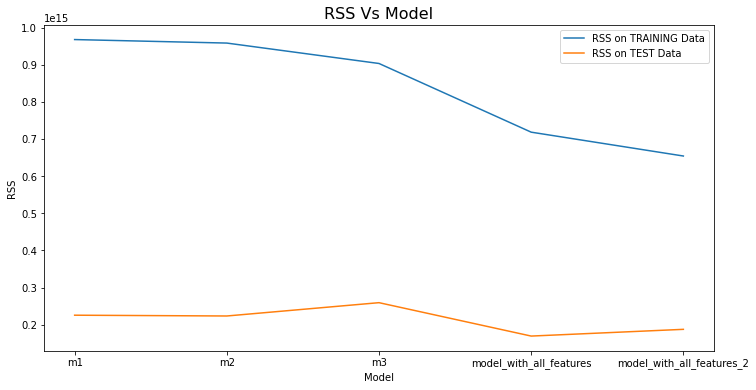

In [26]:
plt.figure(figsize = (12,6))
plt.plot(rss_df['Model'], rss_df['RSS on TRAINING Data'], label = 'RSS on TRAINING Data')
plt.plot(rss_df['Model'], rss_df['RSS on TEST Data'], label = 'RSS on TEST Data')
plt.title('RSS Vs Model', fontsize = 16)
plt.xlabel('Model')
plt.ylabel('RSS')
plt.legend()

In [27]:
# From above plot is seen that RSS on training data is higher than RSS on test data.
# The model is working well with test data.